# EXPLORING CRASH DATA AND PREDICTING SEVERITY

## Table of contents

* [Introduction](#Introduction)

* [Business Understanding](#business-understanding)

* [Problem Statement](#problem-statement)

* [Data Understanding](#data-understanding)

    * [Dataset 1: CRASH Data](#Dataset-1:CRASH-Data)

    * [Dataset 2: Vehicles Data](#Dataset-2:-Vehicles-Data)

    * [Dataset 3: People Data](#Dataset-3:-People-Data)

* [Importing Libraries](#Importing-Libraries)

* [Reading The Datasets](#Reading-The-Datasets)

* [Combining The datasets](#Combining-The-datasets)

* [Data Cleaning](#data-Cleaning)

    * [Dropping Redundant columns](#Dropping-Redundant-columns)

    * [Dropping Irrelevant columns](#Dropping-Irrelevant-Columns)

    * [Handling missing values](#Handling-missing-values)

* [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    * [Univariate analysis](#univariate-analysis)

    * [Bivariate analysis](#bivariate-analysis)

    * [Multivariate analysis](#multivariate-analysis)

* [Modeling](#Modeling)

    * [Model 1](#Model-1)

    * [Model 2](#Model-2)

    * [Model 3](#Model-3)


* [Conclusions](#Conclusions)

* [Recommendation](#recommendations)

# Introduction

Vehicle accidents are a major source of worry for public safety and transportation agencies. They not only cause death and property damage, but also interrupt traffic flow and incur economic losses. Understanding the factors that contribute to these collisions and their effects is critical for putting effective measures in place to decrease their occurrence and impact.

The City of Chicago has collected extensive crash data through its electronic crash reporting system (E-Crash), providing a valuable resource to analyse and gain insights into the factors contributing to accidents. The dataset comprises a wide range of crash parameters, including crash circumstances, vehicles involved, and people affected.

The goal of this study is to analyse the dataset and provide a full understanding of car crashes and their characteristics in the city of Chicago. We hope to discover key factors that contribute to collisions, measure the impact they have, and analyse the circumstances surrounding the accidents by studying the numerous characteristics associated with each crash event.

This project's target audience includes numerous road safety stakeholders such as transportation authorities, law enforcement agencies, policymakers, and insurance companies. Decision-makers can establish focused plans and activities to reduce the frequency and severity of accidents by knowing the fundamental elements that contribute to collisions.

# Business Understanding

The city of Chicago maintains an electronic crash reporting system (E-Crash) which shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data from the CPD's electronic crash reporting system (E-Crash) are displayed without any identifying information. When a crash report is completed or when an existing report in E-Crash receives updates, records are added to the data portal. The drivers involved in most minor incidents self-report about half of all crash reports to the police station, while the other half are documented on the scene by the responding police officer. The reporting officer records several crash parameters, such as information on street conditions, weather, and posted speed restrictions, based on the best information at the moment, but many of these may conflict with posted data or other assessments of road conditions.

The dataset offers useful information for evaluating traffic incidents, spotting patterns, and putting safety measures in place to lower casualties and improve road safety. This information can be used by researchers, decision-makers, and analysts to make more informed choices and enhance overall road transportation systems. The goal of this research is to create a categorization model that will aid in determining the characteristics of an automobile collision that are significant.

# Problem statement

Traffic accidents occur due to various factors, including vehicle characteristics, driver behavior, road conditions, weather, and traffic patterns. The Vehicle Safety Board and the City of Chicago who are the stakeholder recognize the importance of identifying and understanding the various factors leading to the accidents in order to implement targeted safety interventions and improve overall road safety.
From the several factors our primary objective that we aim to achieve are:
 
* To develop a model that can accurately determine the primary cause of car accidents by utilizing data, on vehicles, individuals and road conditions
*  To recommend to the City of Chicago Department of Transportation proactive measures to mitigate the risks, injuries and enhance overall road safety.

# Data Understanding

We will make use of datasets from the Chicago Data Portal, an open data resource where one may find relevant information about the city. In particular we will be focusing on three datasets:Traffic Crashes - Vehicles, Traffic Crashes - People and Traffic Crashes - Crashes. 


 
### Dataset 1: CRASH Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* CRASH_DATE:Date and time of crash as entered by the reporting officer

* WEATHER_CONDITION:Weather condition at time of crash, as determined by reporting officer

* ROADWAY_SURFACE_COND:Road surface condition, as determined by reporting officer

* CRASH_TYPE:A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

The full description of the columns can be found in the data_description.md file.

Insights:When the weather is clear throughout the day, accidents tend to occur more frequently.



### Dataset 2: Vehicles Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. 

* CRASH_UNIT_ID: A unique identifier for each vehicle record.

* MAKE:The make (brand) of the vehicle, if relevant

* VEHICLE_USE: The normal use of the vehicle, if relevant

* EXCEED_SPEED_LIMIT_I:Indicator of whether the unit was speeding, as determined by the reporting officer

The full description of the columns can be found in the data_description.md file.

Insights: 
Passanger vehicles used for personal use are more prone to accidents.We can also see that toyota and chevrolet makes are leading in number of accidents with 118 and 114 respectfully.



### Dataset 3: People Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* PERSON_ID:A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).

* PERSON_TYPE: Type of roadway user involved in crash

* SEX: Gender of person involved in crash, as determined by reporting officer

* AGE: Age of person involved in crash

The full description of the columns can be found in the data_description.md file.

Insights:
Drivers are more prone to be affected with the accidents with 731 cases.
Most victims are Males.
The most affected age group is between 26-30.

## Importing Libraries

In [148]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
# Data visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Model Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
# Handling Class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import Pipeline

## Reading The Datasets

In [100]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
# Load data from CSV files into dataframes
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

## Combining The datasets

In [101]:
#(feature engineering)
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crash, right = vehicle, left_on='crash_record_id', right_on="crash_record_id")
df = pd.merge(left=merged, right=person, left_on = 'vehicle_id', right_on='vehicle_id')
# Display the shape and a preview of the merged dataframe
print(df.shape)
df.head()

(1453, 149)


,crash_record_id_x,rd_no_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,rd_no_y,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,crash_record_id_y,rd_no,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,187fbca810a92ca366a469ca7e826e29405d71d9944947...,NaN,NaN,2023-08-08T22:38:00.000,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",2023-08-08T22:39:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,1400,N,LAKE SHORE DR SB,1824,NaN,NaN,NaN,NaN,NaN,NaN,1,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,3,8,41.907910,-87.625741,POINT (-87.625741088327 41.90790992609),1635265,NaN,2023-08-08T22:38:00.000,1,DRIVER,1.0,1556118.0,NaN,CHEVROLET,IMPALA,IL,NaN,UNKNOWN,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,Y,NaN,2.0,NaN,private,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1635265,DRIVER,187fbca810a92ca366a469ca7e826e29405d71d9944947...,NaN,2023-08-08T22:38:00.000,NaN,MAYWOOD,IL,NaN,M,NaN,NaN,NaN,SAFETY BELT USED,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,NORTHWESTERN,CFD AMB11,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,187fbca810a92ca366a469ca7e826e29405d71d9944947...,NaN,NaN,2023-08-08T22:38:00.000,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",2023-08-08T22:39:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,1400,N,LAKE SHORE DR SB,1824,NaN,NaN,NaN,NaN,NaN,NaN,1,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,3,8,41.907910,-87.625741,POINT (-87.625741088327 41.90790992609),1635265,NaN,2023-08-08T22:38:00.000,1,DRIVER,1.0,1556118.0,NaN,CHEVROLET,IMPALA,IL,NaN,UNKNOWN,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,Y,NaN,2.0,NaN,private,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Cleaning

### Dropping Redundant columns

In [102]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'intersection_related_i', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
cleaned_df = df.drop(columns=drop)
print(cleaned_df.shape)
print(cleaned_df.head())
cleaned_df.info()

(1453, 120)
   rd_no_x crash_date_est_i  posted_speed_limit traffic_control_device  \
0      NaN              NaN                  45            NO CONTROLS   
1      NaN              NaN                  45            NO CONTROLS   
2      NaN              NaN                  30      STOP SIGN/FLASHER   
3      NaN              NaN                  30      STOP SIGN/FLASHER   
4      NaN              NaN                  30                UNKNOWN   

       device_condition weather_condition      lighting_condition  \
0           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
1           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
2  FUNCTIONING PROPERLY             CLEAR  DARKNESS, LIGHTED ROAD   
3  FUNCTIONING PROPERLY             CLEAR  DARKNESS, LIGHTED ROAD   
4               UNKNOWN             OTHER  DARKNESS, LIGHTED ROAD   

           first_crash_type                  trafficway_type  lane_cnt  \
0              FIXED OBJECT       DIVIDED - W/MEDIAN B

In [103]:
# calculating nulls percentage
nulls = cleaned_df.isna().sum()
# Calculate the percentage of null values for columns with missing data
null_percent = nulls[nulls>0] / len(df)
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label[:7]


['rd_no_x',
 'crash_date_est_i',
 'lane_cnt',
 'private_property_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i']

In [104]:
# previewing shape, data and info 
cleaned_df2 = cleaned_df.drop(columns = Index_label)
print(cleaned_df2.shape)
print(cleaned_df2.head())
cleaned_df2.info()

(1453, 47)
   posted_speed_limit traffic_control_device      device_condition  \
0                  45            NO CONTROLS           NO CONTROLS   
1                  45            NO CONTROLS           NO CONTROLS   
2                  30      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   
3                  30      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   
4                  30                UNKNOWN               UNKNOWN   

  weather_condition      lighting_condition          first_crash_type  \
0             CLEAR  DARKNESS, LIGHTED ROAD              FIXED OBJECT   
1             CLEAR  DARKNESS, LIGHTED ROAD              FIXED OBJECT   
2             CLEAR  DARKNESS, LIGHTED ROAD                   TURNING   
3             CLEAR  DARKNESS, LIGHTED ROAD                   TURNING   
4             OTHER  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   

                   trafficway_type roadway_surface_cond road_defect  \
0       DIVIDED - W/MEDIAN BARRIER                  DRY  N

In [105]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
# Display the first few rows of the cleaned DataFrame
print(df.head())
# Display information about the DataFrame's columns and non-null counts
df.info()

(1453, 76)
                                   crash_record_id_x             crash_date_x  \
0  187fbca810a92ca366a469ca7e826e29405d71d9944947...  2023-08-08T22:38:00.000   
1  187fbca810a92ca366a469ca7e826e29405d71d9944947...  2023-08-08T22:38:00.000   
2  b343a78eea1f5d21687b8c742ccfc22e5adce05be5d4de...  2023-08-08T22:13:00.000   
3  b343a78eea1f5d21687b8c742ccfc22e5adce05be5d4de...  2023-08-08T22:13:00.000   
4  58d12fc3cafd5a948f7fa8cf5e7af48f470193b355ff38...  2023-08-08T21:10:00.000   

   posted_speed_limit traffic_control_device      device_condition  \
0                  45            NO CONTROLS           NO CONTROLS   
1                  45            NO CONTROLS           NO CONTROLS   
2                  30      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   
3                  30      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   
4                  30                UNKNOWN               UNKNOWN   

  weather_condition      lighting_condition          first_crash_type  \
0       

### Dropping Irrelevant Columns

In [106]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
columns = ['report_type', 'crash_type', 'bac_result', 'date_police_notified',
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','beat_of_occurrence']

cleaned_df3 = cleaned_df2.drop(columns = columns)
print(cleaned_df3.shape)
cleaned_df3.head()

(1453, 34)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,DRY,NO DEFECTS,NaN,"OVER $1,500",UNABLE TO DETERMINE,1,0,22,3,DRIVER,CHEVROLET,UNKNOWN,PASSENGER,DRIVER,IL,M,NaN,NaN,SAFETY BELT USED,"DEPLOYED, FRONT",NONINCAPACITATING INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,DRY,NO DEFECTS,NaN,"OVER $1,500",UNABLE TO DETERMINE,1,0,22,3,DRIVER,CHEVROLET,UNKNOWN,PASSENGER,PASSENGER,NaN,NaN,NaN,NaN,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN
2,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,Y,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,0,0,22,3,DRIVER,UNKNOWN,UNKNOWN,PASSENGER,DRIVER,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,DISREGARDED CONTROL DEVICES,UNKNOWN,UNKNOWN,NaN,NaN,NaN
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,Y,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,0,0,22,3,DRIVER,MAZDA,NONE,PASSENGER,DRIVER,IL,F,25.0,IL,SAFETY BELT USED,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,OTHER,NOT OBSCURED,NORMAL,NaN,NaN,NaN
4,30,UNKNOWN,UNKNOWN,OTHER,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,UNKNOWN,UNKNOWN,Y,"OVER $1,500",NOT APPLICABLE,0,0,21,3,DRIVER,UNKNOWN,UNKNOWN,UNKNOWN/NA,DRIVER,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN


In [107]:
#Viewing columns after dropping
cleaned_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1452
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1453 non-null   int64  
 1   traffic_control_device   1453 non-null   object 
 2   device_condition         1453 non-null   object 
 3   weather_condition        1453 non-null   object 
 4   lighting_condition       1453 non-null   object 
 5   first_crash_type         1453 non-null   object 
 6   trafficway_type          1453 non-null   object 
 7   roadway_surface_cond     1453 non-null   object 
 8   road_defect              1453 non-null   object 
 9   hit_and_run_i            547 non-null    object 
 10  damage                   1453 non-null   object 
 11  prim_contributory_cause  1453 non-null   object 
 12  injuries_total           1453 non-null   int64  
 13  injuries_fatal           1453 non-null   int64  
 14  crash_hour              

### Handling missing values

In [108]:
#Checking for missing values
missing_values = cleaned_df3.isnull().sum()

In [109]:
#Filling Columns with the object datatype with the value missing
object_columns = list(cleaned_df3.select_dtypes(include=['object']).columns)
for col in object_columns:
    cleaned_df3[col] = cleaned_df3[col].fillna('missing')

In [110]:
#Filling columns with numeric data with the median
integer_columns = list(cleaned_df3.select_dtypes(include=['float','int64']).columns)
for col in integer_columns:
    median_age = df[col].median()
    # Replace null values in the  column with the median
    cleaned_df3[col] = cleaned_df3[col].fillna(median_age)
    

In [111]:
#Checking if there are any other missing values
missing_values = cleaned_df3.isnull().sum()
missing_values

posted_speed_limit         0
traffic_control_device     0
device_condition           0
weather_condition          0
lighting_condition         0
first_crash_type           0
trafficway_type            0
roadway_surface_cond       0
road_defect                0
hit_and_run_i              0
damage                     0
prim_contributory_cause    0
injuries_total             0
injuries_fatal             0
crash_hour                 0
crash_day_of_week          0
unit_type                  0
make                       0
vehicle_defect             0
vehicle_type               0
person_type                0
state                      0
sex                        0
age                        0
drivers_license_state      0
safety_equipment           0
airbag_deployed            0
injury_classification      0
driver_action              0
driver_vision              0
physical_condition         0
pedpedal_action            0
pedpedal_visibility        0
pedpedal_location          0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [112]:
#Describing the dataset
cleaned_df3.describe()

,posted_speed_limit,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,age
count,1453.000000,1453.000000,1453.0,1453.000000,1453.000000,1453.000000
mean,28.850654,0.531315,0.0,13.852719,2.144529,38.437027
std,5.144643,0.746814,0.0,5.523459,0.685168,14.810081
min,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.0,10.000000,2.000000,30.000000
50%,30.000000,0.000000,0.0,15.000000,2.000000,38.000000
75%,30.000000,1.000000,0.0,18.000000,3.000000,47.000000
max,45.000000,4.000000,0.0,23.000000,3.000000,88.000000


Text(0.5, 1.0, 'Age against the Incident count')

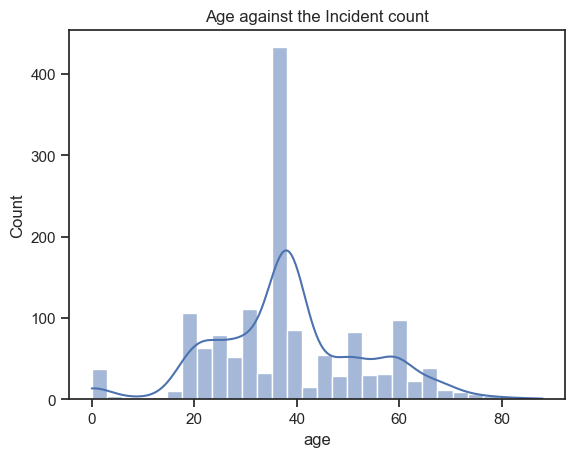

In [113]:
#Plotting a Histogram of Age against the Incident count
sns.histplot(cleaned_df3.age,kde=True)
plt.title("Age against the Incident count" )

## Bivariate Analysis

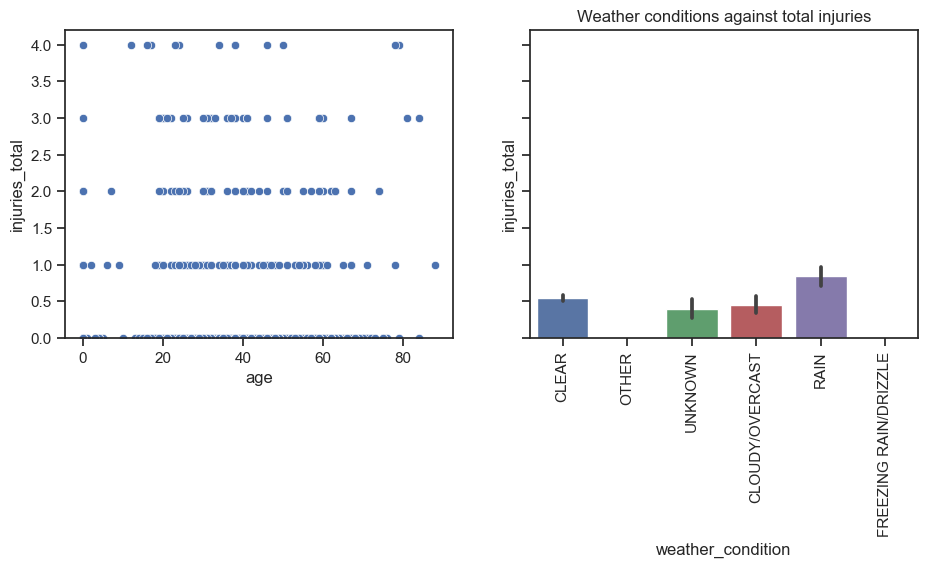

In [114]:
# Creating a scatter plot of age vs. injuries_total
fig, (ax1,ax2) = plt.subplots(ncols=2,sharey=True, figsize=(11,4))
sns.scatterplot(x='age', y='injuries_total', data=cleaned_df3, ax=ax1)
plt.title("Age against total injuries")
#plt.show()
# Create a bar plot of weather_condition vs. injuries_total
sns.barplot(x='weather_condition', y='injuries_total', data=cleaned_df3, ax=ax2) 
plt.xticks(rotation=90)
plt.title("Weather conditions against total injuries")
plt.show()


### Multivariate Analysis

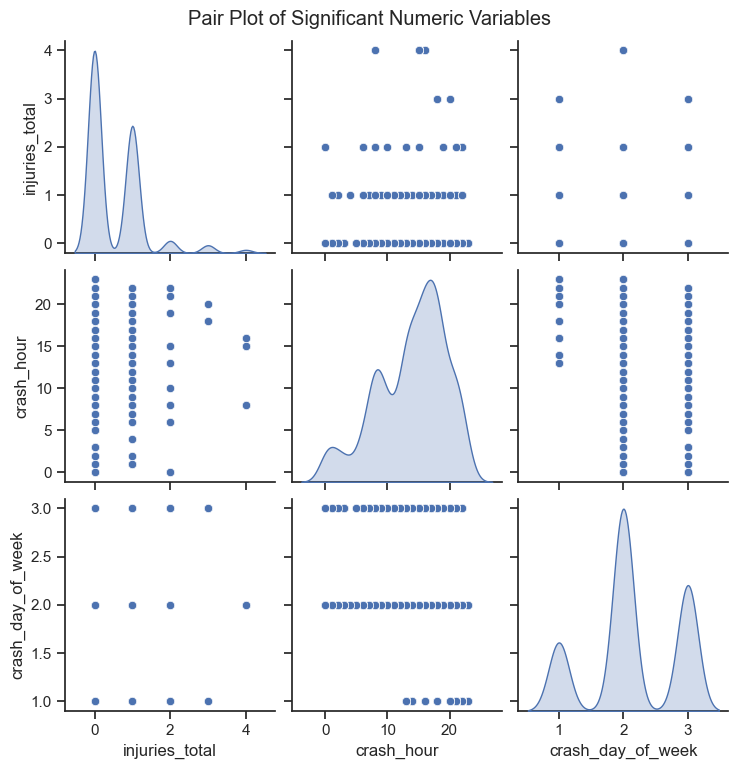

In [115]:
# List of numeric columns for multivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(cleaned_df3[significant_numeric_columns], diag_kind='kde')
pair_plot.fig.suptitle("Pair Plot of Significant Numeric Variables", y=1.02)

plt.show()

# Modeling

### Model 1


#### Research Question:
What are the significant factors influencing the severity of traffic crashes, and can they be used to predict the severity level (e.g., minor, moderate, severe)?

In [116]:
# Selecting a subset of columns for the model
selected_columns = [
    'posted_speed_limit', 'weather_condition', 'roadway_surface_cond', 
    'crash_hour', 'crash_day_of_week', 'unit_type', 'vehicle_type', 
    'state', 'age', 'safety_equipment', 'airbag_deployed', 'injury_classification'
]

# Create a new DataFrame with selected columns
w_df = cleaned_df3[selected_columns].copy()



Features and Target Definition: Here We Separate features (X) and the target (y) from the DataFrame

In [117]:
# Define features (X) and target (y)
X = w_df.drop(columns=['injury_classification'])
y = w_df['injury_classification']



Train-Test Split: We split the data into training and testing sets using a 75-25 split ratio.

In [118]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Preprocessing: Now we Define preprocessing steps for numerical and categorical columns using StandardScaler and OneHotEncoder.

In [119]:
# Define preprocessing steps for numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



Pipeline Creation:We then Create a pipeline that combines preprocessing and the RandomForestClassifier model.

In [120]:
# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])



Model Fitting: We put the pipeline to the training data.

In [121]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['posted_speed_limit', 'crash_hour', 'crash_day_of_week', 'age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['weather_condition', 'roadway_surface_cond', 'unit_type',
       'vehicle_type', 'state', 'safety_equipment', 'airbag_deployed'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

Prediction and Evaluation: We Predict outcomes on the test set and evaluates the model's performance using confusion matrix and classification report.

In [122]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

In [123]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 21   1   3   0]
 [  1 210  13   4]
 [  1  18  61   3]
 [  1  12   7   8]]

Classification Report:
                           precision    recall  f1-score   support

   INCAPACITATING INJURY       0.88      0.84      0.86        25
 NO INDICATION OF INJURY       0.87      0.92      0.90       228
NONINCAPACITATING INJURY       0.73      0.73      0.73        83
   REPORTED, NOT EVIDENT       0.53      0.29      0.37        28

                accuracy                           0.82       364
               macro avg       0.75      0.70      0.71       364
            weighted avg       0.81      0.82      0.82       364



The model achieved an accuracy of approximately 90%. The classification report provides a detailed breakdown of performance for each class, including precision, recall , and F1-score . The weighted average F1-score gives an overall measure of the model's performance across all classes.

Overall, the model appears to perform well, particularly in identifying "INCAPACITATING INJURY" cases. However, it shows lower recall for the "REPORTED, NOT EVIDENT" class, indicating potential room for improvement in identifying such cases. 

### Model 2

Effectiveness of Safety Equipment:

Research Question: What is the impact of safety equipment usage (e.g., seatbelts, airbags) on the occurrence and outcomes of crashes, and can we quantify their effectiveness in reducing injuries?

In [124]:
selected_columns = ['safety_equipment','airbag_deployed','injury_classification','injuries_total']
new_df = cleaned_df3[selected_columns].copy() 
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_total
0,SAFETY BELT USED,"DEPLOYED, FRONT",NONINCAPACITATING INJURY,1
1,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,1
2,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0
3,SAFETY BELT USED,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0
4,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0


In [125]:
safety_equipment_map = {'USAGE UNKNOWN':'USAGE UNKNOWN','SAFETY BELT USED':'SAFETY BELT USED','NONE PRESENT':'NONE PRESENT','HELMET NOT USED':'HELMET NOT USED','missing':'USAGE UNKNOWN',
                        'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'UNKNOWN/OTHER','CHILD RESTRAINT - FORWARD FACING': 'CHILD RESTRAINT','SAFETY BELT NOT USED': 'SAFETY BELT NOT USED','CHILD RESTRAINT - REAR FACING': 'CHILD RESTRAINT','DOT COMPLIANT MOTORCYCLE HELMET': 'UNKNOWN/OTHER','CHILD RESTRAINT - TYPE UNKNOWN': 'CHILD RESTRAINT',                       
                        }
new_df.safety_equipment = new_df.safety_equipment.map(safety_equipment_map)

airbag_deployed_map = {'missing':'DEPLOYMENT UNKNOWN','DID NOT DEPLOY':'DID NOT DEPLOY','NOT APPLICABLE':'NOT APPLICABLE','DEPLOYMENT UNKNOWN':'DEPLOYMENT UNKNOWN',
                        'DEPLOYED, COMBINATION':'DEPLOYED','DEPLOYED, FRONT': 'DEPLOYED','DEPLOYED, SIDE': 'DEPLOYED'                      
                        }
new_df.airbag_deployed = new_df.airbag_deployed.map(airbag_deployed_map)

In [126]:
# creating classes: 0 = not injured, 1 = injured
new_df['injuries_total'] = new_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
new_df.rename(columns={'injuries_total': 'injuries_class'}, inplace=True)
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_class
0,SAFETY BELT USED,DEPLOYED,NONINCAPACITATING INJURY,1
1,SAFETY BELT USED,DEPLOYED,NO INDICATION OF INJURY,1
2,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0
3,SAFETY BELT USED,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0
4,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0


In [127]:
# setting X, y for train-test-split
X = new_df.drop(columns= 'injuries_class')
y = new_df['injuries_class']

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [128]:
num_cols = new_df.drop(columns='injuries_class').select_dtypes('number').columns.tolist()
# creating a pipeline
# RobustScaler will use the median to scale
num_transform = Pipeline([('scale', RobustScaler())])

cat_cols = new_df.drop(columns='injuries_class').select_dtypes('object').columns.tolist()
# creating a pipeline
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [129]:
# combine both pipelines into one using columntransformer 
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [130]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names_out(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf.head()

,safety_equipment_CHILD RESTRAINT,safety_equipment_HELMET NOT USED,safety_equipment_NONE PRESENT,safety_equipment_SAFETY BELT NOT USED,safety_equipment_SAFETY BELT USED,safety_equipment_UNKNOWN/OTHER,safety_equipment_USAGE UNKNOWN,safety_equipment_nan,airbag_deployed_DEPLOYED,airbag_deployed_DEPLOYMENT UNKNOWN,airbag_deployed_DID NOT DEPLOY,airbag_deployed_NOT APPLICABLE,injury_classification_INCAPACITATING INJURY,injury_classification_NO INDICATION OF INJURY,injury_classification_NONINCAPACITATING INJURY,"injury_classification_REPORTED, NOT EVIDENT"
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.570248
1    0.429752
Name: injuries_class, dtype: float64

In [132]:
# Using the SMOTE procedure to solve class imbalance problems
X_train_tf, y_train = SMOTE().fit_resample(X_train_tf, y_train)
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: injuries_class, dtype: float64

In [133]:
# Create and fit a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tf, y_train)

params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# create grid search 
grid = GridSearchCV(clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

c:\Users\Ivan Kibet\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


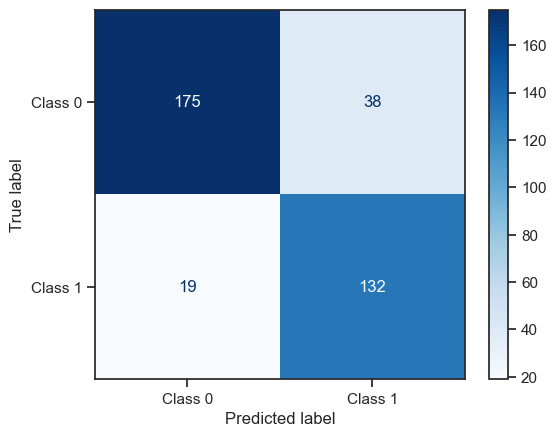

In [134]:
# Get predictions
y_pred = grid.best_estimator_.predict(X_test_tf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [135]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("RMSE:", round(rmse,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))
print("Accuracy:", round(accuracy,2))
print("F1-Score:", round(f1,2))

RMSE: 0.4
Recall: 0.87
Precision: 0.78
Accuracy: 0.84
F1-Score: 0.82


### Model 3

Geographic Hotspots and Prevention Strategies:<br>
Research Question: Can we identify geographic hotspots with higher crash frequencies, and what targeted prevention strategies (e.g., improved signage, traffic control) can be recommended

In [136]:
# create a dataframe
loc_columns = ['location', 'longitude', 'latitude', 'traffic_control_device', 'injuries_total']
loc_df = df[loc_columns].copy()
print(loc_df.shape)
loc_df.head()

(1453, 5)


,location,longitude,latitude,traffic_control_device,injuries_total
0,POINT (-87.625741088327 41.90790992609),-87.625741,41.907910,NO CONTROLS,1
1,POINT (-87.625741088327 41.90790992609),-87.625741,41.907910,NO CONTROLS,1
2,POINT (-87.706367668413 41.884401913381),-87.706368,41.884402,STOP SIGN/FLASHER,0
3,POINT (-87.706367668413 41.884401913381),-87.706368,41.884402,STOP SIGN/FLASHER,0
4,POINT (-87.632986070025 41.900584800211),-87.632986,41.900585,UNKNOWN,0


In [137]:
# listing the locations with the highest injury totals
loc_df.groupby(['location'])['injuries_total'].sum().sort_values(ascending=False).head(10)

location
POINT (-87.636571829866 41.89326536018)     90
POINT (-87.681457630087 41.705891860478)    50
POINT (-87.706710740738 41.895661728843)    26
POINT (-87.713051267198 41.968512941476)    25
POINT (-87.727126873005 41.931831025615)    25
POINT (-87.70767797693 41.946724737237)     25
POINT (-87.633933267711 41.883320022301)    25
POINT (-87.761965620112 41.898419422807)    25
POINT (-87.726554030886 41.906127875249)    25
POINT (-87.690374970986 41.979613171863)    25
Name: injuries_total, dtype: int64

Text(0.5, 1.0, 'Location distribution of injuries')

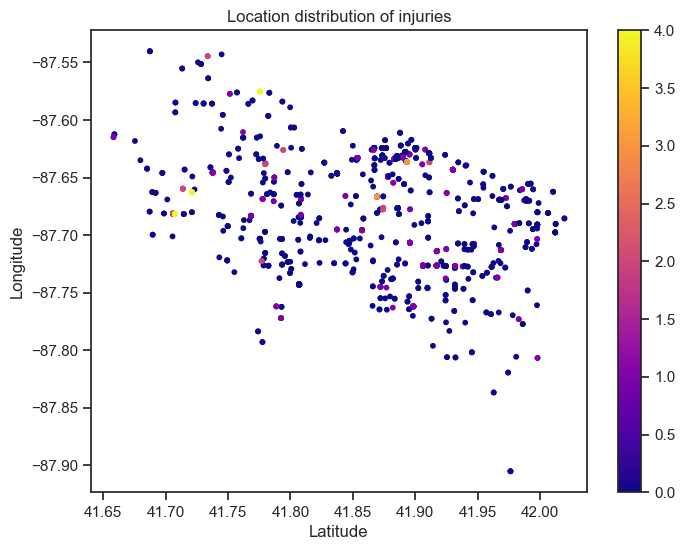

In [138]:
# scatterplot of accident location distribution
fig, ax = plt.subplots(figsize=[8,6])
plt.scatter(loc_df['latitude'], loc_df['longitude'], cmap='plasma', zorder=1000, s=10, c=loc_df['injuries_total'])
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location distribution of injuries')

In [139]:
# creating injury class: 0 = not injured, 1 = injured
loc_df['injuries_total'] = loc_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
loc_df.rename(columns={'injuries_total': 'injury'}, inplace=True)
loc_df.head()

,location,longitude,latitude,traffic_control_device,injury
0,POINT (-87.625741088327 41.90790992609),-87.625741,41.907910,NO CONTROLS,1
1,POINT (-87.625741088327 41.90790992609),-87.625741,41.907910,NO CONTROLS,1
2,POINT (-87.706367668413 41.884401913381),-87.706368,41.884402,STOP SIGN/FLASHER,0
3,POINT (-87.706367668413 41.884401913381),-87.706368,41.884402,STOP SIGN/FLASHER,0
4,POINT (-87.632986070025 41.900584800211),-87.632986,41.900585,UNKNOWN,0


In [140]:
# setting X, y for train-test-split
X_lr = loc_df.drop(columns= ['injury'])
y_lr = loc_df['injury']

# train-test-split, test_size = 25%, random_state = 42
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = .2, random_state=1)

In [141]:
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [142]:
# implementing pipeline using columntransformer 
col1 = ['traffic_control_device']
col2 = loc_df.drop(columns=['injury', 'traffic_control_device', 'location']).select_dtypes('object').columns.tolist()
preprocessing = ColumnTransformer([('cat', cat_transform, col1)])

# preprocessing X_train and X_test
X_train_pp = preprocessing.fit_transform(X_train_lr)
X_test_pp = preprocessing.transform(X_test_lr)

In [143]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_feat = slice_pipe.named_steps['encoder'].get_feature_names_out(col1)
X_train_pp = pd.DataFrame(X_train_pp,columns=[*col2, *cat_feat])
X_train_pp

,traffic_control_device_BICYCLE CROSSING SIGN,traffic_control_device_NO CONTROLS,traffic_control_device_OTHER,traffic_control_device_OTHER REG. SIGN,traffic_control_device_SCHOOL ZONE,traffic_control_device_STOP SIGN/FLASHER,traffic_control_device_TRAFFIC SIGNAL,traffic_control_device_UNKNOWN
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1159,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# observing y_train(classes) count 
y_train_lr.value_counts(normalize=True)

0    0.571429
1    0.428571
Name: injury, dtype: float64

In [145]:
# instantiate and fit logisticregression
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train_pp, y_train_lr)

LogisticRegression()

c:\Users\Ivan Kibet\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


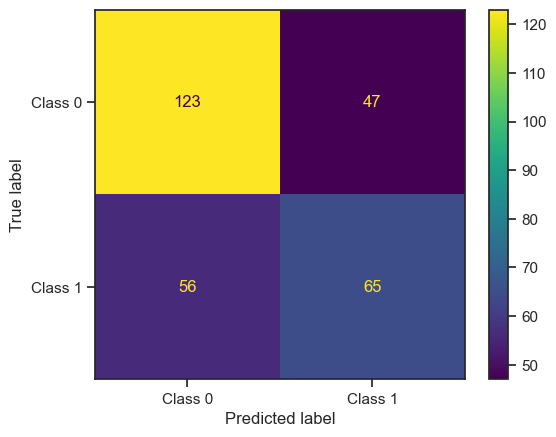

In [146]:
# Get predictions and plot confussion matrix
y_pred_lg = log_reg.predict(X_test_pp)

# Calculate the confusion matrix
con_mat = confusion_matrix(y_test_lr, y_pred_lg)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=['Class 0', 'Class 1'])
display.plot()

plt.show()

In [147]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse_lr = mean_squared_error(y_test_lr, y_pred_lg, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall_lr = recall_score(y_test_lr, y_pred_lg)
precision_lr = precision_score(y_test_lr, y_pred_lg)
accuracy_lr = accuracy_score(y_test_lr, y_pred_lg)
f1_lr = f1_score(y_test_lr, y_pred_lg)

print("RMSE:", round(rmse_lr,2))
print("Recall:", round(recall_lr,2))
print("Precision:", round(precision_lr,2))
print("Accuracy:", round(accuracy_lr,2))
print("F1-Score:", round(f1_lr,2))

RMSE: 0.59
Recall: 0.54
Precision: 0.58
Accuracy: 0.65
F1-Score: 0.56


# Conclusions

# Recommendations